<a href="https://colab.research.google.com/github/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/blob/master/Timothy_Carroll_Unit_1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preface:

As the pandemic of the COVID-19 virus has spread across the world and impacted more and more lives, researchers, doctors, media, and lay-people alike have tried to understand it. The question of its transmission, severity of symptoms and mortality rate have all be under scrutiny. I believe the most asked question would be:

 "*how would COVID-19 affect myself and my loved ones if we were to be infected?*"

and so arose the prevelance of the "at-risk population" in the conversation of how to handle this virus. The elderly, those with prexisting lung conditions, smokers, the immune-comprised all became hyper aware of the elevated threat they faced.


Research Question:

How do population risk factors affect the mortality/infection rate?(As of 7/22/20)?

In [2]:
## DAY ONE - PLAN OF ATTACK

## Analyze and understand my data. Account for what features I need, and drop those I dont. Clean and 
## reshape as need.


In [3]:
import pandas as pd
import numpy as np 

## Dataset 1 - Health Factors

The first dataset's source: 
https://healthdata.gov/dataset/community-health-status-indicators-chsi-combat-obesity-heart-disease-and-cancer

I am taking only the 'RISKFACTORSANDACCESSTOCARE.csv" from this dataset as it is the most relevant to my research question. 

In [4]:
activity_diet = pd.read_csv('https://raw.githubusercontent.com/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/master/RISKFACTORSANDACCESSTOCARE.csv')
print(activity_diet.shape)
activity_diet.head()

(3141, 31)


,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,25.6,16.2,35.0,-1111.1,-1111.1,-1111.1,17.7,10.2,25.1,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,77.8,95.4,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,-1111.1,-1111.1,-1111.1,23.6,16.7,30.4,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


In [5]:
activity_diet.isnull().sum()

State_FIPS_Code                0
County_FIPS_Code               0
CHSI_County_Name               0
CHSI_State_Name                0
CHSI_State_Abbr                0
Strata_ID_Number               0
No_Exercise                    0
CI_Min_No_Exercise             0
CI_Max_No_Exercise             0
Few_Fruit_Veg                  0
CI_Min_Fruit_Veg               0
CI_Max_Fruit_Veg               0
Obesity                        0
CI_Min_Obesity                 0
CI_Max_Obesity                 0
High_Blood_Pres                0
CI_Min_High_Blood_Pres         0
CI_Max_High_Blood_Pres         0
Smoker                         0
CI_Min_Smoker                  0
CI_Max_Smoker                  0
Diabetes                       0
CI_Min_Diabetes                0
CI_Max_Diabetes                0
Uninsured                      0
Elderly_Medicare               0
Disabled_Medicare              0
Prim_Care_Phys_Rate            0
Dentist_Rate                   0
Community_Health_Center_Ind    0
HPSA_Ind  

In [6]:
#dropping everything after "CI_Max_Diabetes" feature as they relate more so to insurance and dental care
activ_diet = activity_diet.drop(activity_diet.loc[:, 'Uninsured' : 'HPSA_Ind'], axis = 1)
print(activ_diet.shape)
activ_diet.head()

(3141, 24)


,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,25.6,16.2,35.0,-1111.1,-1111.1,-1111.1,17.7,10.2,25.1,6.6,2.0,11.3
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,77.8,95.4,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,13.1,4.7,21.5
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,-1111.1,-1111.1,-1111.1,23.6,16.7,30.4,8.4,4.4,12.4


In [7]:
# I can also drop "State_FIPS_Code" and "County_FIPS_CODE"
activ_diet = activ_diet.drop(activ_diet.loc[:, 'State_FIPS_Code' : 'County_FIPS_Code'], axis = 1)

In [8]:
## missing values are denoted by -1111.1 in this dataframe. I will replace them with NaN and then fill with last valid observation with .ffill()
activ_diet = activ_diet.replace(-1111.1, np.nan)
activ_diet = activ_diet.ffill(axis = 0)
activ_diet.head()

,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,Barbour,Alabama,AL,51,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
3,Bibb,Alabama,AL,42,27.2,23.2,31.2,86.6,77.8,95.4,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,13.1,4.7,21.5
4,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4


In [9]:
#Lastly, ill change the CHSI_County_Name, CHSI_State_Name, and CHSI_State_Abbr to match that of my other datasets. 
activ_diet = activ_diet.rename(columns={'CHSI_County_Name': "County Name", 'CHSI_State_Name'	: "Full State", 'CHSI_State_Abbr': "State"})
activ_diet.head()

,County Name,Full State,State,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,Barbour,Alabama,AL,51,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
3,Bibb,Alabama,AL,42,27.2,23.2,31.2,86.6,77.8,95.4,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,13.1,4.7,21.5
4,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4


In [10]:
## after some consideration, the full state name column does nothing for me. Ill delete that 
activ_diet = activ_diet.drop('Full State', axis=1)

## Dataset 2 - Confirmed Cases

In [11]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/master/covid_confirmed_usafacts.csv')
print(confirmed_cases.shape)
confirmed_cases.head()

(3195, 187)


,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,331,357,368,373,375,400,411,431,434,442,453,469,479,488,498,503,527,537,553,561,568,591,615,618,644,651,661,670,684,706,728,746,756,780,789,827,842,857,865,886
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,361,364,383,389,392,401,413,420,430,437,450,464,477,515,555,575,643,680,703,751,845,863,881,911,997,1056,1131,1187,1224,1294,1359,1414,1518,1599,1689,1819,1937,2013,2102,2196
3,1005,Barbour County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,226,234,238,245,251,263,266,272,272,277,280,288,305,312,317,317,322,325,326,335,348,350,352,356,360,366,371,381,398,403,413,428,441,459,463,483,495,503,514,518
4,1007,Bibb County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,100,104,111,116,118,121,126,126,127,129,135,141,149,153,161,162,165,170,174,179,189,190,193,197,199,201,211,218,224,228,231,236,242,247,255,264,269,279,283,287


In [12]:
confirmed_cases.isnull().sum()

countyFIPS     0
County Name    0
State          0
stateFIPS      0
1/22/20        0
              ..
7/18/20        0
7/19/20        0
7/20/20        0
7/21/20        0
7/22/20        0
Length: 187, dtype: int64

In [13]:
# Because I'm only interested in the total values, im going to drop almost all of my columns with values for confirmed covid cases.
# I only need the most recent. 
total_cases = confirmed_cases.drop(confirmed_cases.loc[:, '1/22/20' : '7/21/20'], axis = 1)
print(total_cases.shape)
total_cases.head()

(3195, 5)


,countyFIPS,County Name,State,stateFIPS,7/22/20
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,886
2,1003,Baldwin County,AL,1,2196
3,1005,Barbour County,AL,1,518
4,1007,Bibb County,AL,1,287


In [14]:
total_cases = total_cases.rename(columns = {"7/22/20": "Confirmed Cases"})
total_cases.head()

,countyFIPS,County Name,State,stateFIPS,Confirmed Cases
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,886
2,1003,Baldwin County,AL,1,2196
3,1005,Barbour County,AL,1,518
4,1007,Bibb County,AL,1,287


## Dataset 3 - County Deaths 

In [15]:
covid_deaths = pd.read_csv('https://raw.githubusercontent.com/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/master/covid_deaths_usafacts.csv')
print(covid_deaths.shape)
covid_deaths.head()

(3195, 187)


,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,7,7,8,8,9,9,9,9,11,11,11,12,12,12,12,12,13,13,13,13,13,13,13,14,15,15,16,16,18,19,20,21,21,21,21,21,21
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,11,12,12,12,12,12,13,14,14,15,15,15,16,16
3,1005,Barbour County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4
4,1007,Bibb County,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2


In [16]:
covid_deaths.isnull().sum()

countyFIPS     0
County Name    0
State          0
stateFIPS      0
1/22/20        0
              ..
7/18/20        0
7/19/20        0
7/20/20        0
7/21/20        0
7/22/20        0
Length: 187, dtype: int64

In [17]:
# Will do the same with the deaths as i did with the confirmed cases; drop all accept totals
total_deaths = covid_deaths.drop(covid_deaths.loc[:, '1/22/20' : '7/21/20'], axis = 1)
print(total_deaths.shape)
total_deaths.head()

(3195, 5)


,countyFIPS,County Name,State,stateFIPS,7/22/20
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,21
2,1003,Baldwin County,AL,1,16
3,1005,Barbour County,AL,1,4
4,1007,Bibb County,AL,1,2


In [18]:
total_deaths = total_deaths.rename(columns = {"7/22/20": "COVID19 Deaths"})
total_deaths.head()

,countyFIPS,County Name,State,stateFIPS,COVID19 Deaths
0,0,Statewide Unallocated,AL,1,0
1,1001,Autauga County,AL,1,21
2,1003,Baldwin County,AL,1,16
3,1005,Barbour County,AL,1,4
4,1007,Bibb County,AL,1,2


## Dataset 4 - County total populations

In [19]:
county_population = pd.read_csv('https://raw.githubusercontent.com/timrocar/COVID19-Mortality-vs-Diet-PhysicalActivity/master/covid_county_population_usafacts.csv')
print(county_population.shape)
county_population.head()

(3195, 4)


,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [20]:
county_population.isnull().sum()

countyFIPS     0
County Name    0
State          0
population     0
dtype: int64

## Combining Datasets:

Datasets 2-4 share 4 columns, so I will combine them first

In [21]:
county_population['Confirmed Cases'] = total_cases['Confirmed Cases']


In [22]:
county_population['COVID19 Deaths'] = total_deaths['COVID19 Deaths']


In [23]:
combined_covid_data = county_population


In [24]:
print(combined_covid_data.shape)
combined_covid_data.head()

(3195, 6)


,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths
0,0,Statewide Unallocated,AL,0,0,0
1,1001,Autauga County,AL,55869,886,21
2,1003,Baldwin County,AL,223234,2196,16
3,1005,Barbour County,AL,24686,518,4
4,1007,Bibb County,AL,22394,287,2


In [25]:
#droppiung first row with no values
combined_covid_data= combined_covid_data.drop(0)

In [26]:
#dropping 'County' from from my county name column to be compatible with my other dataframe
combined_covid_data['County Name'] = combined_covid_data['County Name'].str.replace(' County', '')
combined_covid_data.head()

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths
1,1001,Autauga,AL,55869,886,21
2,1003,Baldwin,AL,223234,2196,16
3,1005,Barbour,AL,24686,518,4
4,1007,Bibb,AL,22394,287,2
5,1009,Blount,AL,57826,547,1


In [27]:
#merging my data
largedf = pd.merge(combined_covid_data, activ_diet, how = 'inner')
print(largedf.shape)
largedf

(3014, 25)


,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,1001,Autauga,AL,55869,886,21,29,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,1003,Baldwin,AL,223234,2196,16,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,1005,Barbour,AL,24686,518,4,51,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
3,1007,Bibb,AL,22394,287,2,42,27.2,23.2,31.2,86.6,77.8,95.4,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,13.1,4.7,21.5
4,1009,Blount,AL,57826,547,1,28,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,56037,Sweetwater,WY,42343,201,2,77,21.9,19.8,24.1,80.7,78.0,83.5,23.6,21.2,25.9,22.7,19.4,25.9,27.4,24.9,29.9,5.3,4.2,6.4
3010,56039,Teton,WY,23464,234,1,78,9.6,7.3,11.9,68.8,64.2,73.3,9.0,6.9,11.2,18.9,14.6,23.3,13.7,10.7,16.7,2.4,1.4,3.4
3011,56041,Uinta,WY,20226,224,0,38,23.4,20.5,26.3,83.1,79.9,86.3,22.7,19.6,25.7,22.5,18.3,26.7,21.6,18.8,24.5,4.8,3.4,6.2
3012,56043,Washakie,WY,7805,45,5,82,23.2,18.8,27.6,78.1,72.3,83.9,21.1,16.9,25.3,27.8,20.8,34.7,19.7,15.5,24.0,9.4,6.6,12.1


In [28]:
#make a dataframe of counties with over 300 cases , for sake of useable data
finaldf = largedf[largedf['Confirmed Cases'] > 300]

In [29]:
finaldf = finaldf.drop(['Strata_ID_Number'], axis=1)

In [30]:
finaldf

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,1001,Autauga,AL,55869,886,21,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,1003,Baldwin,AL,223234,2196,16,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,1005,Barbour,AL,24686,518,4,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
4,1009,Blount,AL,57826,547,1,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
5,1011,Bullock,AL,10101,407,12,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,55131,Washington,WI,136034,608,19,17.8,13.9,21.8,78.1,73.0,83.2,19.2,14.9,23.6,21.5,15.1,28.0,17.9,13.9,21.8,3.3,1.6,5.0
2986,55133,Waukesha,WI,404198,2540,42,16.6,13.9,19.3,73.4,70.0,76.9,17.6,15.2,20.1,22.9,19.1,26.8,16.8,14.2,19.4,5.2,3.9,6.5
2989,55139,Winnebago,WI,171907,884,15,19.4,16.1,22.6,83.4,79.8,87.0,23.3,19.8,26.7,24.2,18.9,29.5,19.7,16.3,23.1,8.7,6.5,10.8
2997,56013,Fremont,WY,39261,438,10,21.3,19.1,23.5,76.6,73.5,79.7,21.4,19.2,23.7,23.0,19.9,26.2,21.6,19.3,23.9,6.9,5.5,8.3


In [31]:
## DAY TWO PLAN OF ATTACK
## Search for valuable info to plot using my main factor: Confirmed cases vs deaths. Compare that to reported exercise levels, reported obesity, few fruit + veg consumption

In [32]:
finaldf['Mortality Rate']= finaldf['COVID19 Deaths'] / finaldf['Confirmed Cases']

In [33]:
cols = list(finaldf.columns.values)

In [34]:
finaldf = finaldf.reindex(columns =['countyFIPS', 'County Name', 'State', 'population', 'Confirmed Cases', 'COVID19 Deaths', 'Mortality Rate', 'No_Exercise', 'CI_Min_No_Exercise',
 'CI_Max_No_Exercise', 'Few_Fruit_Veg', 'CI_Min_Fruit_Veg', 'CI_Max_Fruit_Veg', 'Obesity', 'CI_Min_Obesity', 'CI_Max_Obesity', 'High_Blood_Pres',
 'CI_Min_High_Blood_Pres', 'CI_Max_High_Blood_Pres', 'Smoker', 'CI_Min_Smoker', 'CI_Max_Smoker', 'Diabetes', 'CI_Min_Diabetes', 'CI_Max_Diabetes'])

In [35]:
finaldf

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,Mortality Rate,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
0,1001,Autauga,AL,55869,886,21,0.023702,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3
1,1003,Baldwin,AL,223234,2196,16,0.007286,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
2,1005,Barbour,AL,24686,518,4,0.007722,27.2,23.2,31.2,76.2,71.2,81.3,25.6,16.2,35.0,30.5,24.5,36.6,17.7,10.2,25.1,6.6,2.0,11.3
4,1009,Blount,AL,57826,547,1,0.001828,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
5,1011,Bullock,AL,10101,407,12,0.029484,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,30.5,24.5,36.6,23.6,16.7,30.4,8.4,4.4,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,55131,Washington,WI,136034,608,19,0.031250,17.8,13.9,21.8,78.1,73.0,83.2,19.2,14.9,23.6,21.5,15.1,28.0,17.9,13.9,21.8,3.3,1.6,5.0
2986,55133,Waukesha,WI,404198,2540,42,0.016535,16.6,13.9,19.3,73.4,70.0,76.9,17.6,15.2,20.1,22.9,19.1,26.8,16.8,14.2,19.4,5.2,3.9,6.5
2989,55139,Winnebago,WI,171907,884,15,0.016968,19.4,16.1,22.6,83.4,79.8,87.0,23.3,19.8,26.7,24.2,18.9,29.5,19.7,16.3,23.1,8.7,6.5,10.8
2997,56013,Fremont,WY,39261,438,10,0.022831,21.3,19.1,23.5,76.6,73.5,79.7,21.4,19.2,23.7,23.0,19.9,26.2,21.6,19.3,23.9,6.9,5.5,8.3


In [36]:
mort = finaldf['Mortality Rate']
noex = finaldf['No_Exercise']
fewf = finaldf['Few_Fruit_Veg']
obese = finaldf['Obesity']
highbp = finaldf['High_Blood_Pres']
smoker = finaldf['Smoker']
diabetes = finaldf['Diabetes']

In [37]:
diabetes.corr(mort)

-0.042168023288335514

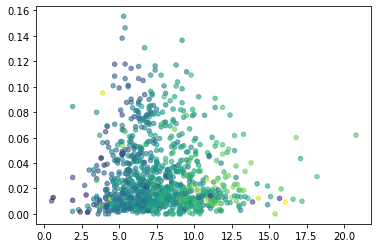

In [38]:
import matplotlib.pyplot as plt


plt.scatter(diabetes, mort, c=obese, alpha= .6, s=20)
plt.show()

In [39]:
noex.corr(mort)

-0.020683759490769865

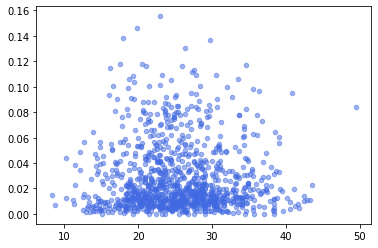

In [40]:
plt.scatter(noex, mort, c='royalblue', alpha= .5, s=20)
plt.show()

In [41]:
obese.corr(mort)

-0.08246052064088809

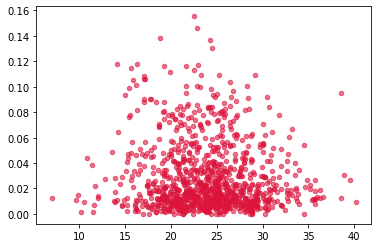

In [42]:
plt.scatter(obese, mort, c='crimson', alpha= .6, s=20)
plt.show()

In [43]:
smoker.corr(mort)

-0.019126019407389897

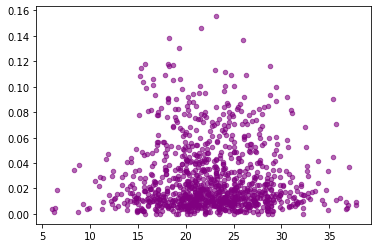

In [44]:
plt.scatter(smoker, mort, c='purple', alpha= .6, s=20)
plt.show()

In [45]:
#so after some testing of the graphs and looking at correlations,
## I think using counties with 300+ cases may not be the best. I will try with
## 1000+ cases to see how that looks 

In [46]:
smalldf = largedf[largedf['Confirmed Cases'] > 1000]
smalldf = smalldf.drop(['Strata_ID_Number'], axis=1)

In [47]:
smalldf['Mortality Rate']= smalldf['COVID19 Deaths'] / smalldf['Confirmed Cases']

In [48]:
smalldf['Infection Rate'] = smalldf['Confirmed Cases'] / smalldf['population']

In [49]:
smalldf = smalldf.reindex(columns =['countyFIPS', 'County Name', 'State', 'population', 'Confirmed Cases', 'COVID19 Deaths', 'Mortality Rate','Infection Rate', 'No_Exercise', 'CI_Min_No_Exercise',
 'CI_Max_No_Exercise', 'Few_Fruit_Veg', 'CI_Min_Fruit_Veg', 'CI_Max_Fruit_Veg', 'Obesity', 'CI_Min_Obesity', 'CI_Max_Obesity', 'High_Blood_Pres',
 'CI_Min_High_Blood_Pres', 'CI_Max_High_Blood_Pres', 'Smoker', 'CI_Min_Smoker', 'CI_Max_Smoker', 'Diabetes', 'CI_Min_Diabetes', 'CI_Max_Diabetes'])

In [50]:
smalldf

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,Mortality Rate,Infection Rate,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
1,1003,Baldwin,AL,223234,2196,16,0.007286,0.009837,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3
23,1047,Dallas,AL,37196,1205,16,0.013278,0.032396,31.5,23.9,39.1,85.9,79.4,92.4,36.6,28.8,44.5,35.0,26.0,44.0,20.4,13.9,27.0,11.5,7.2,15.7
24,1049,DeKalb,AL,71513,1377,8,0.005810,0.019255,37.0,30.4,43.6,80.7,74.0,87.5,24.3,18.2,30.3,35.3,25.8,44.8,19.1,13.6,24.6,7.8,4.6,11.0
25,1051,Elmore,AL,81209,1353,33,0.024390,0.016661,27.7,22.0,33.4,85.0,78.6,91.3,24.8,19.2,30.4,23.0,15.6,30.4,22.6,17.1,28.1,5.5,3.2,7.8
27,1055,Etowah,AL,102268,1471,15,0.010197,0.014384,34.1,29.6,38.5,81.4,76.0,86.8,27.1,22.8,31.3,38.2,31.2,45.2,31.5,26.8,36.2,10.2,7.5,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,55059,Kenosha,WI,169561,2102,47,0.022360,0.012397,19.4,15.5,23.2,79.2,73.7,84.7,26.8,22.3,31.3,25.6,19.4,31.9,29.9,25.2,34.5,4.7,2.8,6.6
2959,55079,Milwaukee,WI,945726,16777,417,0.024855,0.017740,23.1,21.5,24.7,77.5,75.7,79.3,21.8,20.3,23.4,24.2,21.9,26.5,25.7,24.0,27.4,6.4,5.5,7.2
2970,55101,Racine,WI,196311,2739,69,0.025192,0.013952,20.4,17.1,23.6,78.2,74.1,82.3,22.1,18.6,25.7,26.7,21.6,31.8,25.9,22.2,29.6,7.1,5.1,9.0
2972,55105,Rock,WI,163354,1228,25,0.020358,0.007517,23.3,19.8,26.9,79.5,75.0,84.1,24.4,20.7,28.1,19.5,14.6,24.4,26.4,22.4,30.5,7.5,5.4,9.6


In [51]:
# breaking down columns for graphing and analysis 
mort = smalldf['Mortality Rate']
noex = smalldf['No_Exercise']
fewf = smalldf['Few_Fruit_Veg']
obese = smalldf['Obesity']
highbp = smalldf['High_Blood_Pres']
smoker = smalldf['Smoker']
diabetes = smalldf['Diabetes']
cases = smalldf['Confirmed Cases']
deaths = smalldf['COVID19 Deaths']
infecrate= smalldf['Infection Rate']


In [52]:
#testing correlations between mortality rates and health factors
print('Obesity', mort.corr(obese))
print('No exercise', mort.corr(noex))
print('Few Fruits and Veggies', mort.corr(fewf))
print('High Blood Pressure', mort.corr(highbp))
print('Smoker', mort.corr(smoker))
print('Diabetes', mort.corr(diabetes))

Obesity -0.1808126738577272
No exercise -0.061470564838516296
Few Fruits and Veggies -0.24961069557650342
High Blood Pressure -0.006672855598466564
Smoker -0.0578359605298898
Diabetes -0.09673776968880815


There is a slight correlation between county's obesity percentage and the mortality rates of COVID19.
Additionally lack of fruits and vegatable consumption and the mortality rates of COVID19s.

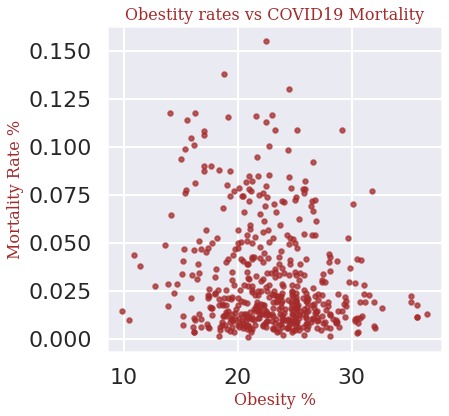

In [101]:
fig, ax = plt.subplots(figsize=(6,6))
font = {'family': 'serif',
        'color':  'brown',
        'weight': 'normal',
        'size': 16}
ax.set_title("Obestity rates vs COVID19 Mortality", fontdict=font)
ax.set_xlabel('Obesity %', fontdict=font)
ax.set_ylabel('Mortality Rate %', fontdict=font)

plt.scatter(obese, mort, color='brown', alpha= .7, s=20)
plt.show()

In [133]:
##who are these 6 most obese counties?
smalldf[smalldf['Obesity'] > 35]

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,Mortality Rate,Infection Rate,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
23,1047,Dallas,AL,37196,1205,16,0.013278,0.032396,31.5,23.9,39.1,85.9,79.4,92.4,36.6,28.8,44.5,35.0,26.0,44.0,20.4,13.9,27.0,11.5,7.2,15.7
390,13069,Coffee,GA,43273,1080,21,0.019444,0.024958,41.1,34.1,48.1,84.1,77.5,90.6,35.2,28.4,41.9,35.6,26.8,44.3,27.1,21.0,33.2,9.6,5.5,13.8
1377,28151,Washington,MS,43909,1128,20,0.017730,0.025689,39.5,34.3,44.7,83.0,77.9,88.2,35.7,30.6,40.9,40.8,33.0,48.6,24.6,19.5,29.7,10.2,7.3,13.0
2251,45075,Orangeburg,SC,86175,1695,38,0.022419,0.019669,30.0,25.8,34.2,79.5,74.4,84.6,35.2,30.8,39.6,35.7,29.6,41.9,21.0,17.2,24.8,9.9,7.4,12.4
2422,48005,Angelina,TX,86715,1234,14,0.011345,0.014231,38.4,30.4,46.4,80.9,72.7,89.0,35.7,27.7,43.8,27.5,21.0,34.0,26.2,18.9,33.5,8.9,4.6,13.2
2430,48021,Bastrop,TX,88723,1056,12,0.011364,0.011902,38.4,30.4,46.4,88.3,79.5,97.1,35.7,27.7,43.8,27.5,21.0,34.0,12.5,4.9,20.0,4.3,0.8,7.8


In [129]:
smalldf['Obesity'].mean()

22.881836327345344

In [ ]:
#where are these counties mostly located?
obesetest = smalldf[smalldf['Obesity'] > 22.8]
obesetest['State'].value_counts()

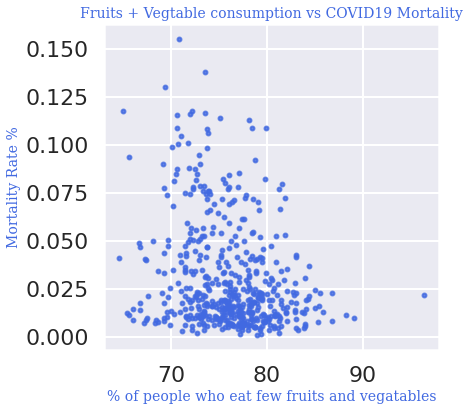

In [103]:
font = {'family': 'serif',
        'color':  'royalblue',
        'weight': 'normal',
        'size': 14,}
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Fruits + Vegtable consumption vs COVID19 Mortality", fontdict=font)
ax.set_xlabel('% of people who eat few fruits and vegatables' , fontdict=font)
ax.set_ylabel('Mortality Rate %', fontdict=font)

plt.scatter(fewf, mort, c='royalblue', alpha= .8, s=15)
plt.show()

In [126]:
smalldf['Few_Fruit_Veg'].mean()

76.06706586826344

In [127]:
## lets break down this data further
fruitsandveghigh = smalldf[smalldf['Few_Fruit_Veg'] > 76]
fruitsandveglow = smalldf[smalldf['Few_Fruit_Veg'] < 76]
print(fruitsandveghigh['population'].mean())
print(fruitsandveglow['population'].mean())

375043.9767441861
584016.8925619834


In [ ]:
fruitsandveghigh['State'].value_counts()

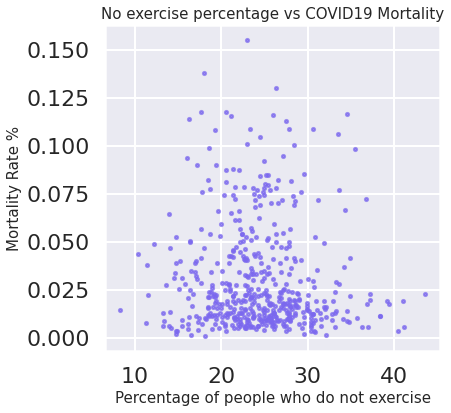

In [64]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("No exercise percentage vs COVID19 Mortality", size=15)
ax.set_xlabel('Percentage of people who do not exercise', size=15)
ax.set_ylabel('Mortality Rate %', size=15)


plt.scatter(noex, mort, c='mediumslateblue', alpha= .7, s=10)
plt.show()

In [56]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


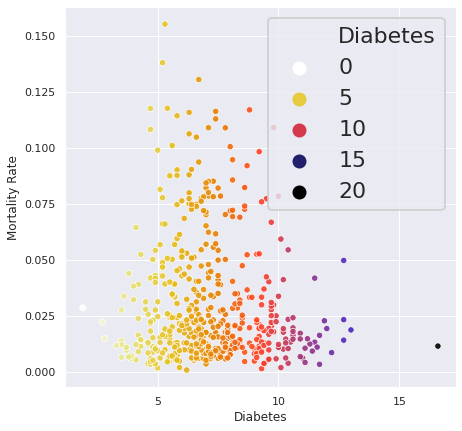

In [77]:
sns.set(style='darkgrid', font_scale= 1)

f, ax = plt.subplots(figsize=(7,7))
ax.set(xlabel='Diabetes', ylabel='Mortality Rate', )
sns.set_context('poster')
sns.scatterplot(x=diabetes, y=mort, hue=diabetes, palette='CMRmap_r',s=40, alpha=.9)
plt.show()

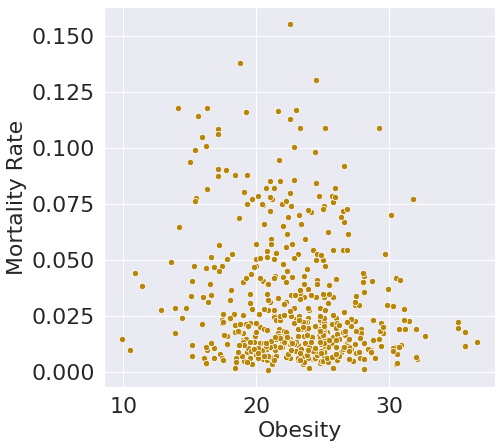

In [81]:
sns.set(style='darkgrid', font_scale=2)

f, ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('High Blood Pressure', size=22)
ax.set_ylabel('Mortality Rate', size=22)
sns.set_context('poster')

sns.scatterplot(x=obese, y=mort, color='darkgoldenrod', s=40)
plt.show()

In [59]:
## After seeing some of my visualizations, I'd like to also compare infection rates vs some of these factors
#testing correlations between mortality rates and health factors
print('Obesity', infecrate.corr(obese))
print('No exercise', infecrate.corr(noex))
print('Few Fruits and Veggies', infecrate.corr(fewf))
print('High Blood Pressure', infecrate.corr(highbp))
print('Smoker', infecrate.corr(smoker))
print('Diabetes', infecrate.corr(diabetes))

Obesity 0.19251290782965694
No exercise 0.3680676441744459
Few Fruits and Veggies 0.1460479874019734
High Blood Pressure 0.12321244555929084
Smoker 0.10316784281642574
Diabetes 0.2336986936117266


Interestingly, there is again a correlation between obesity % and the percentage of covid cases in a county. 
However, the correlation between fruits and vegtable consumption isnt as prevelent. What is very prevelent however is the correlation between lack of exercise and the percentage of those infected. 

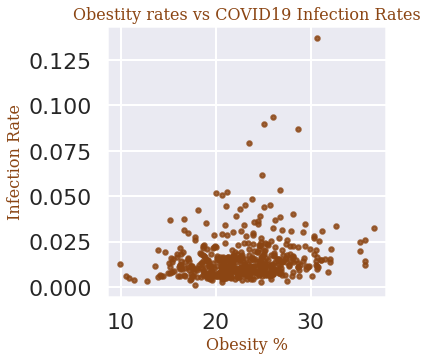

In [98]:

font = {'family': 'serif',
        'color':  'saddlebrown',
        'weight': 'normal',
        'size': 16,
        }
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Obesity %', fontdict=font)
ax.set_ylabel('Infection Rate' , fontdict=font)
ax.set_title("Obestity rates vs COVID19 Infection Rates", fontdict=font)

plt.scatter(obese, infecrate, c='saddlebrown', alpha= .8, s=20)
plt.show()

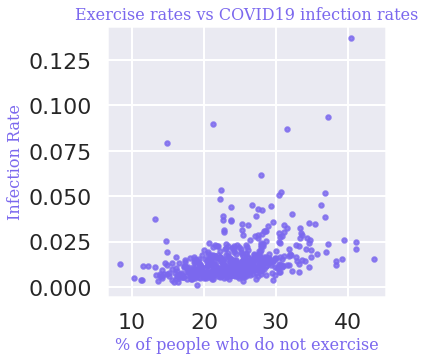

In [83]:
font = {'family': 'serif',
        'color':  'mediumslateblue',
        'weight': 'normal',
        'size': 16,
        }
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlabel('% of people who do not exercise', fontdict=font)
ax.set_ylabel('Infection Rate' , fontdict=font)
ax.set_title("Exercise rates vs COVID19 infection rates", fontdict=font)
plt.scatter(noex, infecrate, c='mediumslateblue', alpha= .8, s=20)
plt.show()

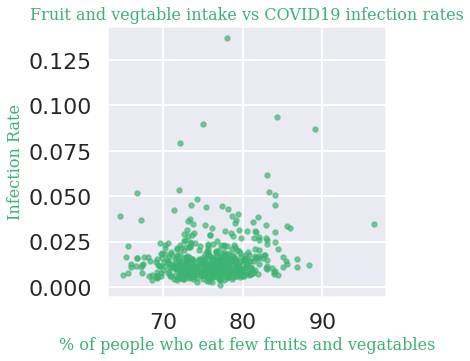

In [91]:
font = {'family': 'serif',
        'color':  'mediumseagreen',
        'weight': 'normal',
        'size': 16,
        }
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('% of people who eat few fruits and vegatables', fontdict=font)
ax.set_ylabel('Infection Rate', fontdict=font)
ax.set_title("Fruit and vegtable intake vs COVID19 infection rates", fontdict=font)

plt.scatter(fewf, infecrate, c='mediumseagreen', alpha= .6, s=20)
plt.show()

In [86]:
#curious as to which county the outlier is 
smalldf[smalldf['Few_Fruit_Veg'] > 90]

,countyFIPS,County Name,State,population,Confirmed Cases,COVID19 Deaths,Mortality Rate,Infection Rate,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes
314,12051,Hendry,FL,42022,1451,32,0.022054,0.03453,25.3,15.3,35.2,96.4,93.2,99.6,29.4,20.0,38.8,34.3,27.4,41.3,23.5,13.7,33.3,7.6,2.6,12.6


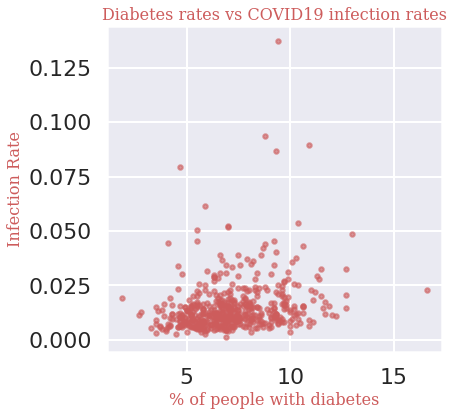

In [93]:
font = {'family': 'serif',
        'color':  'indianred',
        'weight': 'normal',
        'size': 16,
        }
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('% of people with diabetes', fontdict=font)
ax.set_ylabel('Infection Rate', fontdict=font)
ax.set_title("Diabetes rates vs COVID19 infection rates", fontdict=font)
plt.scatter(diabetes, infecrate, c='indianred', alpha= .6, s=20)
plt.show()

In [107]:
states = smalldf['State']

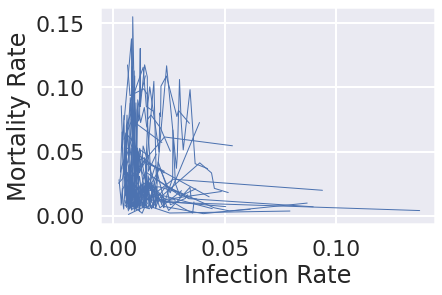

In [118]:
ax = sns.lineplot(x=infecrate, y=mort, units=states,estimator=None,lw=1,
                  data=smalldf)